In [3]:

Pkg.add("Plots")
Pkg.add("SpatialDependence")
Pkg.add("SpatialDatasets")
Pkg.add("StableRNGs")

using SpatialDependence
using SpatialDatasets
using StableRNGs

LoadError: UndefVarError: Pkg not defined

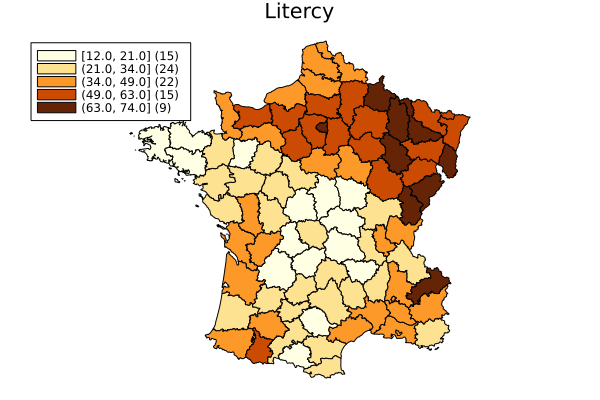

In [6]:
# Load packages
using Plots
using SpatialDependence
using SpatialDatasets
using StableRNGs

# Guerry's Moral statistics of France data from the SpatialDatasets.jl package
guerry = sdataset("Guerry");

# Plot Litercy variable
plot(guerry, :Litercy, NaturalBreaks(), legend = :topleft, title = "Litercy")

In [18]:
# Build polygon contiguity matrix
W = polyneigh(guerry.geometry);
W

Spatial Weights 
Observations: 85 
Transformation: row
Minimum nunmber of neighbors: 2
Maximum nunmber of neighbors: 8
Average number of neighbors: 4.9412
Median number of neighbors: 5.0
Islands (isloated): 0
Density: 5.8131% 


In [2]:
# Global Moran test of Spatial Autocorrelation of the Litercy variable
moran(guerry.Litercy, W, permutations = 9999, rng = StableRNG(1234567))

LoadError: UndefVarError: StableRNG not defined

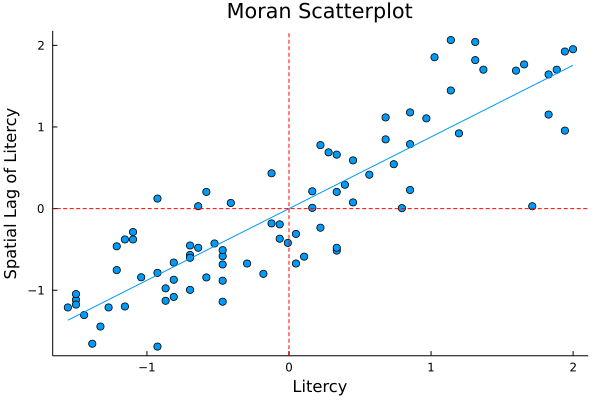

In [12]:
# Moran Scatterplot of the Litercy variable
plot(guerry.Litercy, W, xlabel = "Litercy")

In [13]:
# Local Indicators of Spatial Association (LISA) - Local Moran
lmguerry = localmoran(guerry.Litercy, W, permutations = 9999, rng = StableRNG(1234567))

Local Moran test of Spatial Autocorrelation
--------------------------------------------

Randomization test with 9999 permutations.
Interesting locations at 0.05 significance level:
       High-High: 18
         Low-Low: 20
        Low-High: 0
        High-Low: 0


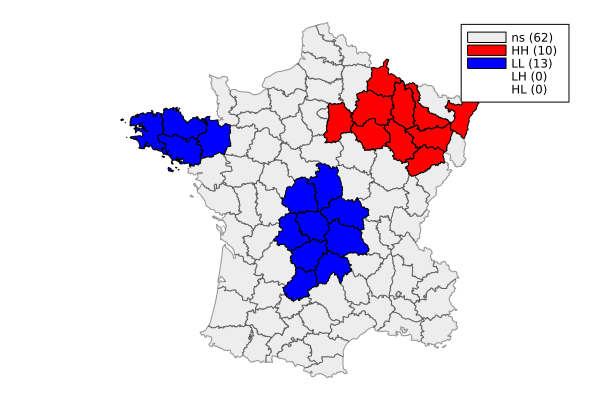

In [14]:
# LISA Cluster Map
plot(guerry, lmguerry, sig = 0.05, adjust = :fdr)